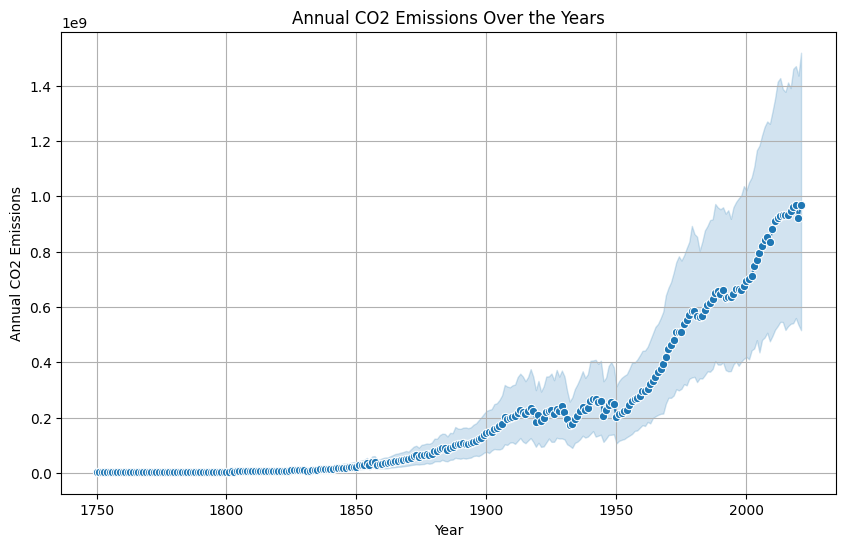

<ipython-input-2-5ee42b3fb039>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


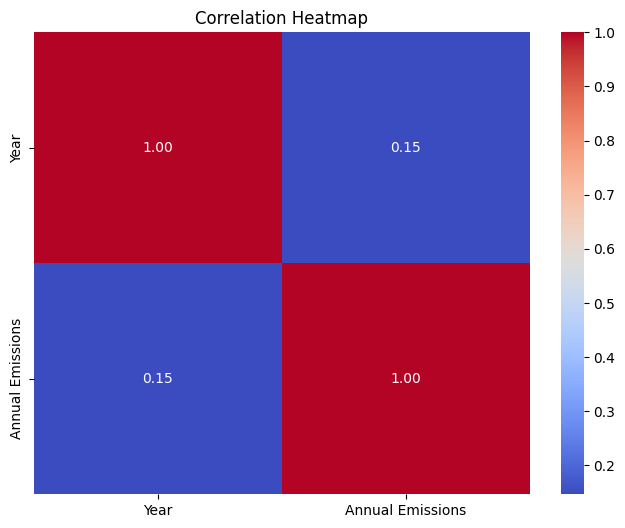

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.metrics import confusion_matrix

# Load the data from CSV
df = pd.read_csv('emissions.csv')

# annual CO2 emissions over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Annual Emissions', data=df, marker='o')
plt.title('Annual CO2 Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Annual CO2 Emissions')
plt.grid(True)
plt.show()

# correlation between year and emissions
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


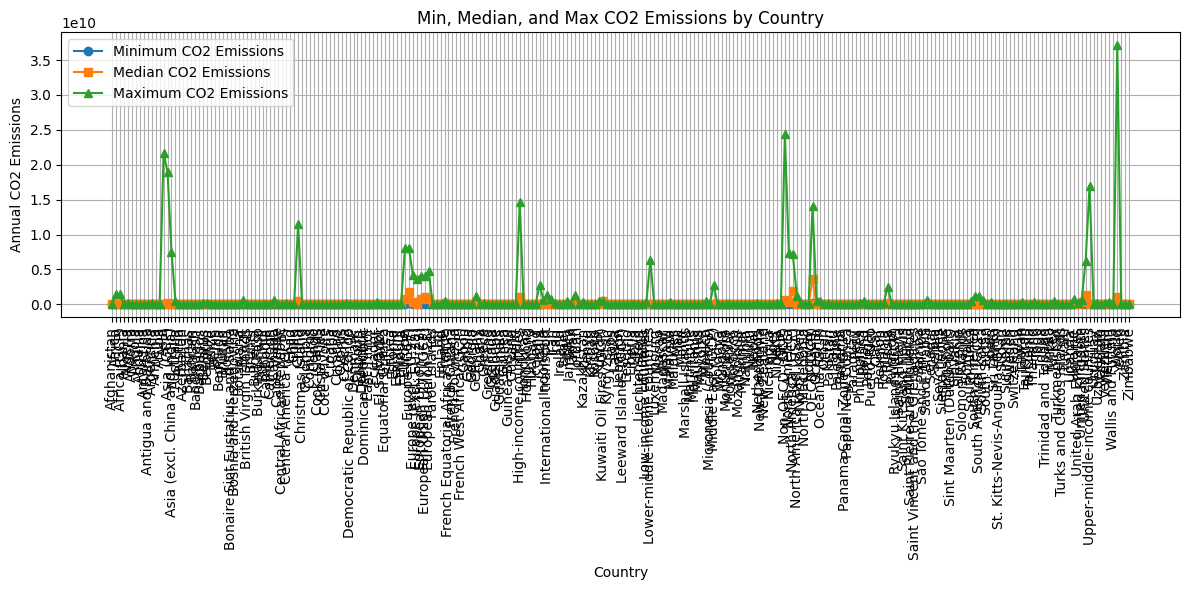

In [3]:
#  statistics (min, median, max) dependent on country
country_stats = df.groupby('Entity')['Annual Emissions'].agg(['min', 'median', 'max']).reset_index()

# Visualize
plt.figure(figsize=(12, 6))

# minimum emissions
plt.plot(country_stats['Entity'], country_stats['min'], label='Minimum CO2 Emissions', marker='o')

# median emissions
plt.plot(country_stats['Entity'], country_stats['median'], label='Median CO2 Emissions', marker='s')

# maximum emissions
plt.plot(country_stats['Entity'], country_stats['max'], label='Maximum CO2 Emissions', marker='^')

plt.title('Min, Median, and Max CO2 Emissions by Country')
plt.xlabel('Country')
plt.ylabel('Annual CO2 Emissions')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-5-2ce656ffee07>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


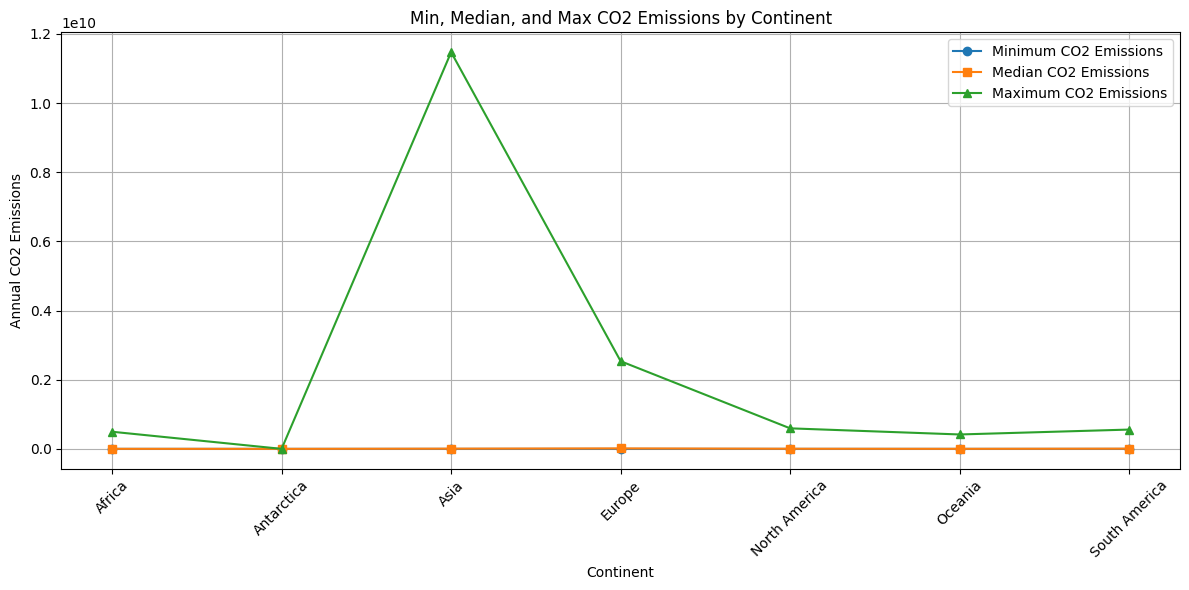

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge data with world map data
merged = pd.merge(world, df, left_on='name', right_on='Entity', how='right')

# Cstatistics (min, median, max) dependent on continent
continent_stats = merged.groupby('continent')['Annual Emissions'].agg(['min', 'median', 'max']).reset_index()

# Visualize
plt.figure(figsize=(12, 6))

# minimum emissions
plt.plot(continent_stats['continent'], continent_stats['min'], label='Minimum CO2 Emissions', marker='o')

# median emissions
plt.plot(continent_stats['continent'], continent_stats['median'], label='Median CO2 Emissions', marker='s')

# maximum emissions
plt.plot(continent_stats['continent'], continent_stats['max'], label='Maximum CO2 Emissions', marker='^')

plt.title('Min, Median, and Max CO2 Emissions by Continent')
plt.xlabel('Continent')
plt.ylabel('Annual CO2 Emissions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

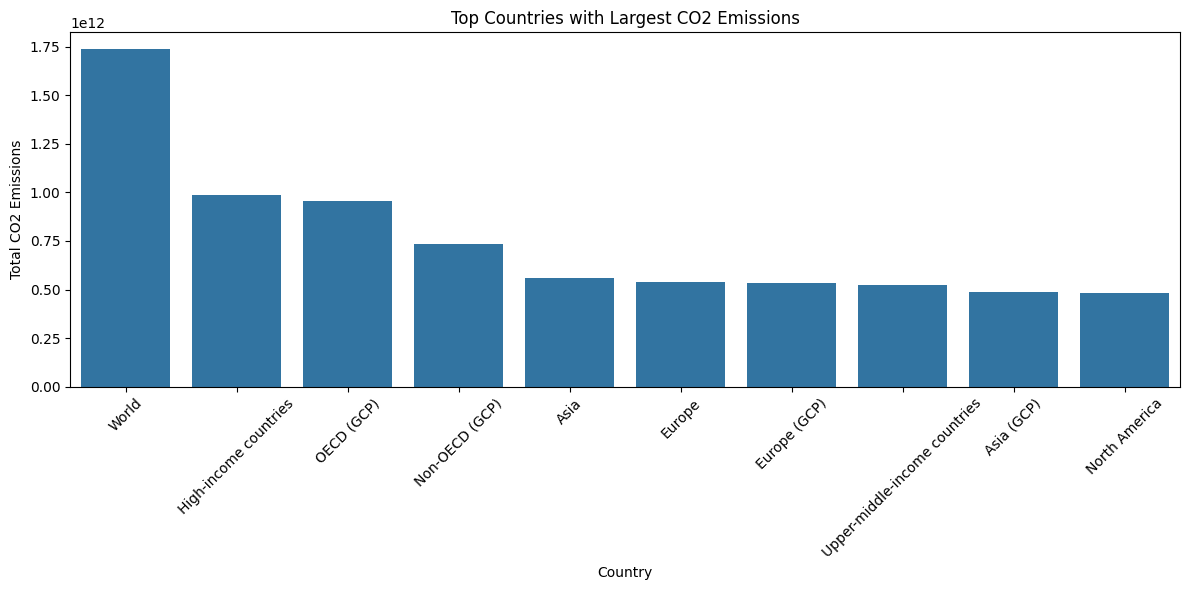

In [11]:
# Group data by country
country_emissions = df.groupby('Entity')['Annual Emissions'].sum().reset_index()

# Sort
country_emissions_sorted = country_emissions.sort_values(by='Annual Emissions', ascending=False)

#  top N countries with the largest emissions
top_countries = country_emissions_sorted.head(10)  # Change the number as per your requirement

#  emissions for the top countries
plt.figure(figsize=(12, 6))
sns.barplot(x='Entity', y='Annual Emissions', data=top_countries)
plt.title('Top Countries with Largest CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-12-dc7c0bc50afe>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


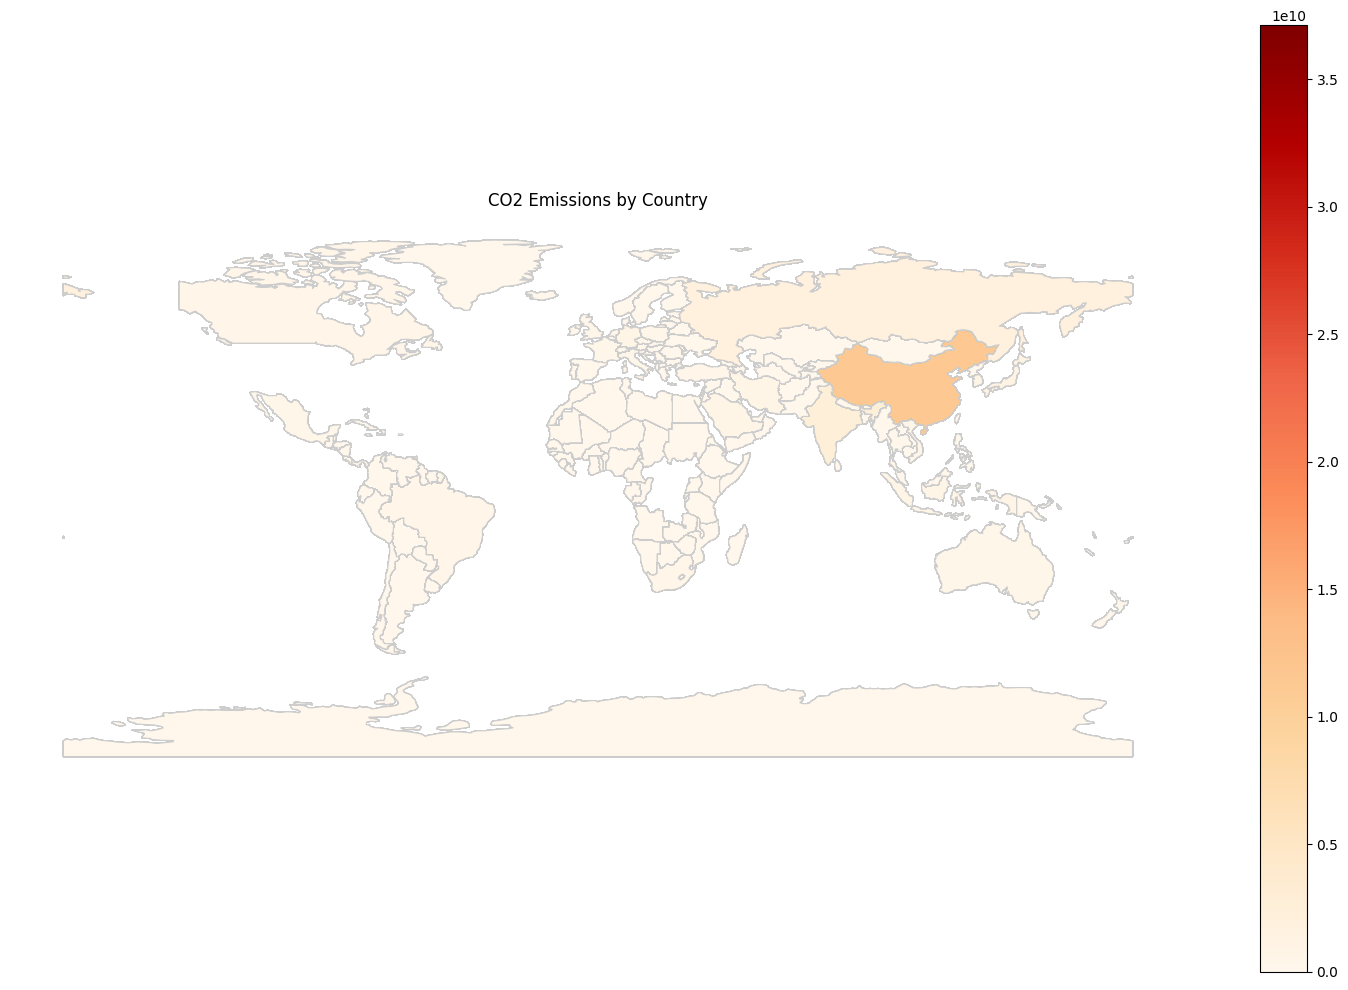

In [12]:
# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge data with world map data
merged = pd.merge(world, df, left_on='name', right_on='Entity', how='right')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Annual Emissions', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('CO2 Emissions by Country')
plt.axis('off')
plt.tight_layout()
plt.show()